In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import warnings
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report as cr
import pickle

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
dataset = pd.read_csv("IMDB_dataset_preprocessed.csv")
reviews = [w for w in dataset["review"]]
tokenized_words = [gensim.utils.simple_preprocess(w) for w in reviews]

In [3]:
# CBOW model
CBOW = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                              vector_size = 100, window = 5)

In [4]:
# Skip Gram model
Skip_Gram = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                                   vector_size = 100, window = 5, sg = 1)

In [5]:
# 10 most similar words to "movie" - CBOW
print(CBOW.wv.most_similar('movie'))

[('film', 0.8614087104797363), ('flick', 0.7056543827056885), ('sure', 0.5978928208351135), ('guess', 0.5899489521980286), ('think', 0.5864476561546326), ('thats', 0.5829828977584839), ('really', 0.5796080231666565), ('sequel', 0.5596968531608582), ('probably', 0.5575019121170044), ('one', 0.5571088194847107)]


In [6]:
# 10 most similar words to "movie" - Skip-Gram
print(Skip_Gram.wv.most_similar('movie'))

[('film', 0.9169373512268066), ('atleast', 0.8606958985328674), ('havent', 0.8603647947311401), ('noroi', 0.8561639189720154), ('classed', 0.8527695536613464), ('kairo', 0.8497358560562134), ('strangeland', 0.8494115471839905), ('gymkata', 0.8454180955886841), ('hellborn', 0.8441919684410095), ('definately', 0.8404426574707031)]


In [7]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec CBOW : ",
CBOW.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec CBOW :  0.8614087


In [8]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec Skip Gram : ",
Skip_Gram.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec Skip Gram :  0.91693735


In [9]:
# word vector for "word" - CBOW
CBOW.wv["word"]

array([ 0.6526196 ,  0.97499907, -1.3058894 ,  1.4511875 , -1.207476  ,
        0.44969746,  0.8204881 ,  0.62045807,  0.59349406, -2.325909  ,
       -1.7115284 , -2.0065882 , -1.3909165 ,  1.1234242 , -0.36226425,
       -1.3845348 , -1.5656005 ,  0.5650764 ,  0.56011677, -1.2715254 ,
       -0.5799136 ,  0.14500616,  2.403057  ,  0.08514342,  0.12930414,
        0.7354083 , -0.5511373 ,  1.8231097 , -1.3577447 ,  2.4092011 ,
       -1.6557853 , -1.6923255 , -0.7486774 , -1.8429466 ,  1.7377939 ,
       -2.2683    ,  0.7105833 ,  1.1070528 ,  1.7449118 ,  0.8833759 ,
        0.78019726,  1.6509631 ,  2.2275715 ,  1.0667877 ,  0.18433756,
        0.34460834, -0.01730174, -1.9155755 ,  1.2531403 , -0.17353098,
       -1.7821896 ,  1.1944914 , -1.5634118 ,  0.73384124,  2.1331089 ,
        0.5010516 , -0.9138342 , -0.5138361 , -2.0702348 ,  3.036924  ,
        0.86921   , -3.1428485 ,  1.0558674 , -1.0256234 ,  0.7864416 ,
       -0.22436963, -1.3017973 ,  0.5335801 , -0.54321426, -0.60

In [10]:
# word vector for "word" - Skip-Gram
Skip_Gram.wv["word"]

array([-0.15382986,  0.40165874, -0.28123358, -0.2213752 ,  0.05740354,
       -0.54565954,  0.42504102,  0.7875403 , -0.0645819 , -0.37346536,
        0.02518096, -0.42690417, -0.28700367,  0.28749278, -0.06637834,
       -0.31559387, -0.14757684, -0.18655491,  0.14431478, -0.17780569,
        0.21541627, -0.05145617,  0.78011644, -0.29718906, -0.20921254,
        0.34854147, -0.23066017,  0.04715181, -0.17981274,  0.354372  ,
        0.05547636, -0.26362562,  0.5687688 , -0.18077628,  0.02891013,
       -0.21219052,  0.27619419, -0.26770785, -0.11979751, -0.33560732,
        0.33203772,  0.25248393,  0.8958985 ,  0.08544292,  0.04943155,
       -0.10381365, -0.20768756, -0.38486236,  0.30511618,  0.46493205,
        0.18800499,  0.11491307,  0.04261395, -0.04176256, -0.03488927,
        0.21673332,  0.23031554, -0.29019699, -0.7173725 ,  0.50553   ,
        0.14791167, -0.28163898, -0.04928314, -0.34858215, -0.0238496 ,
        0.01111953,  0.33958516,  0.15254138, -0.546589  ,  0.05

In [11]:
#vocab = list(CBOW.wv.key_to_index)
#X = CBOW.wv[vocab]

#tsne = TSNE(n_components = 2)
#X_tsne = tsne.fit_transform(X)

#df = pd.DataFrame(X_tsne, index = vocab, columns = ['x', 'y'])

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

#ax.scatter(df['x'], df['y'])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos)

In [12]:
def display_closestwords_tsnescatterplot(model, modelName, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0)
        np.set_printoptions(suppress = True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'movie' - Word2vec " + modelName, pad = 20)
    plt.show()

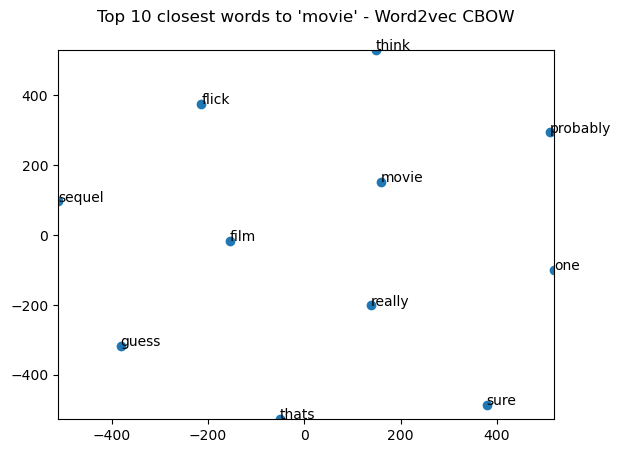

In [13]:
display_closestwords_tsnescatterplot(CBOW.wv, 'CBOW', 'movie', 100)

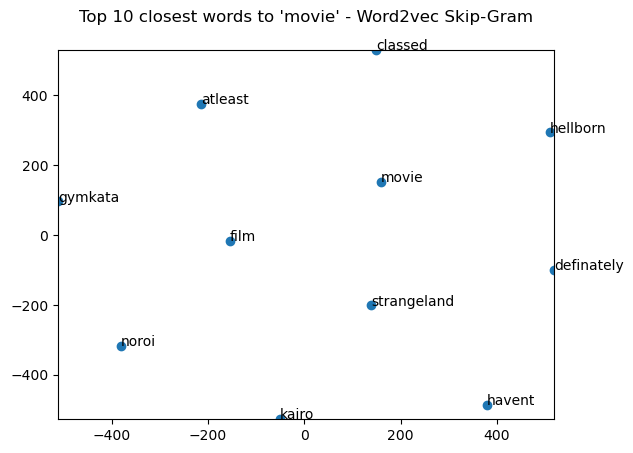

In [14]:
display_closestwords_tsnescatterplot(Skip_Gram.wv, 'Skip-Gram', 'movie', 100)

In [15]:
def getWordVectorCBOW(doc):
    return [CBOW.wv[word] for word in doc if word in CBOW.wv.index_to_key]

In [16]:
word_vectors_CBOW = []
for i in range(len(tokenized_words)):
    word_vectors_CBOW.append(getWordVectorCBOW(tokenized_words[i]))

In [17]:
def getWordVectorSkipGram(doc):
    return [Skip_Gram.wv[word] for word in doc if word in Skip_Gram.wv.index_to_key]

In [18]:
word_vectors_Skip_Gram = []
for i in range(len(tokenized_words)):
    word_vectors_Skip_Gram.append(getWordVectorSkipGram(tokenized_words[i]))

In [19]:
# saving the vectors to disk
pickle_out = open("word2vec_cbow_vectors_preprocessed.pickle", "wb")
pickle.dump(word_vectors_CBOW, pickle_out)
pickle_out.close()

In [20]:
# saving the vectors to disk
pickle_out = open("word2vec_skip-gram_vectors_preprocessed.pickle", "wb")
pickle.dump(word_vectors_Skip_Gram, pickle_out)
pickle_out.close()